In [1]:
import datetime as dt
import sqlite3

import pandas as pd

db_conn = sqlite3.connect('/home/orestis/code/Orestis/InvestorAPI/app/database/ibd.db')

query = '''
    SELECT * 
    FROM price_prediction_dataset_v2
    WHERE DATE(Date) <= date('now', '-3 months')
    ORDER BY DATE(Date)
'''

dataset = pd.read_sql(query, db_conn)

In [2]:
dataset.dropna(inplace=True)

In [11]:
dataset.columns

Index(['Date', 'symbol', 'sector', 'interest_rate', 'treasury_yield',
       'price_pct_change_last_three_months', 'price_pct_change_last_month',
       'price_volatility_last_three_months', 'price_volatility_last_month',
       'price_pct_change_next_three_months', 'price_pct_change_next_month',
       'sector_pct_change_last_three_months', 'sector_pct_change_last_month',
       'capital_expenditures_arctan_pct_change',
       'cash_and_cash_equivalents_at_carrying_value_arctan_pct_change',
       'cashflow_from_financing_arctan_pct_change',
       'cashflow_from_investment_arctan_pct_change',
       'current_net_receivables_arctan_pct_change',
       'dividend_payout_arctan_pct_change', 'ebitda_arctan_pct_change',
       'gross_profit_arctan_pct_change', 'inventory_arctan_pct_change',
       'long_term_debt_arctan_pct_change', 'net_income_arctan_pct_change',
       'net_interest_income_arctan_pct_change',
       'operating_cashflow_arctan_pct_change',
       'operating_income_arctan_

Overall Accuracy: 34.83%


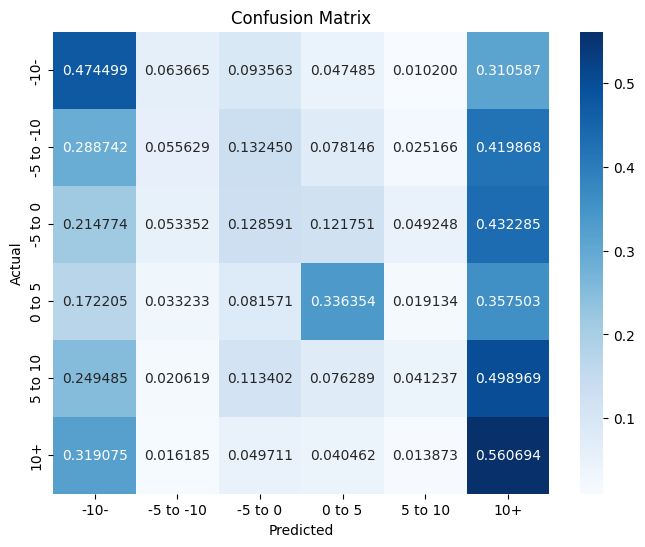

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import (
    OneHotEncoder,
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from analytics.machine_learning.price_prediction_with_fundamentals import utils


# Create categorical target
bins = [-float('inf'), -0.10, -0.05, 0, 0.05, 0.10, float('inf')]
labels = ['-10-', '-5 to -10', '-5 to 0', '0 to 5', '5 to 10', '10+']
label_mapping = {0: '-10-', 1: '-5 to -10', 2: '-5 to 0', 3: '0 to 5', 4: '5 to 10', 5: '10+'}

dataset['next_three_months_pct_change_range'] = pd.cut(
    dataset['price_pct_change_next_three_months'],
    bins=bins,
    labels=[0, 1, 2, 3, 4, 5],
    right=False
)


train_set, test_set = utils.split_data_to_train_and_test(
    df=dataset,
    cutoff_date=dt.datetime(2023,8,1),
    cutoff_date_column_name='Date'
)

cols_to_drop = ['symbol', 'Date', 'price_pct_change_next_three_months', 'price_pct_change_next_month', 'next_three_months_pct_change_range']
target_col = 'next_three_months_pct_change_range'

y_train = train_set[target_col]
X_train = train_set.drop(cols_to_drop, axis=1)

y_test = test_set[target_col]
X_test = test_set.drop(cols_to_drop, axis=1)

# categorical_columns = ['sector', 'last_three_months_pct_change_range']
column_transformer = make_column_transformer(
    (
        OneHotEncoder(), ['sector']
    ),
    remainder='passthrough'
)

xgb_classifier = make_pipeline(
    column_transformer,
    xgb.XGBClassifier()
)

xgb_classifier.fit(X_train, y_train)
y_pred_xgb_classifier = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb_classifier)
print(f"Overall Accuracy: {accuracy:.2%}")

y_test = [label_mapping[y] for y in y_test]
y_pred = [label_mapping[y] for y in y_pred_xgb_classifier]
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Overall Accuracy: 39.99%


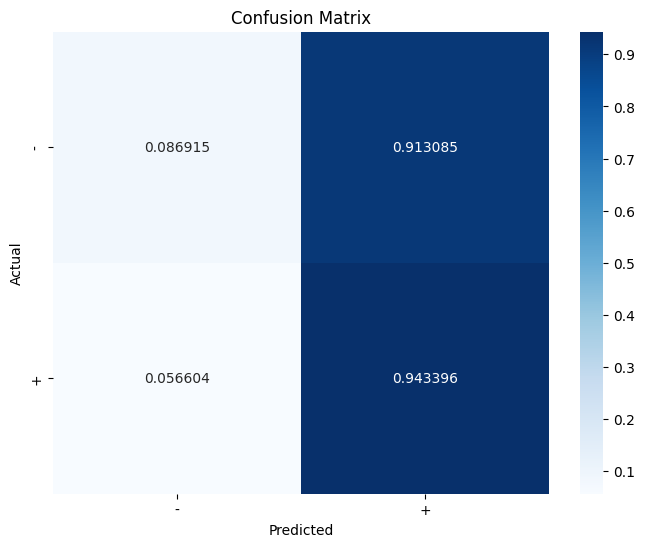

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import (
    OneHotEncoder,
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from analytics.machine_learning.price_prediction_with_fundamentals import utils


# Create categorical target
bins = [-float('inf'), 0,  float('inf')]
labels = ['-', '+']
label_mapping = {0: '-', 1: '+'}

dataset['next_month_pct_change_range'] = pd.cut(
    dataset['price_pct_change_next_month'],
    bins=bins,
    labels=[0, 1],
    right=False
)


train_set, test_set = utils.split_data_to_train_and_test(
    df=dataset,
    cutoff_date=dt.datetime(2023,8,1),
    cutoff_date_column_name='Date'
)

cols_to_drop = ['symbol', 'Date', 'price_pct_change_next_three_months', 'price_pct_change_next_month', 'next_month_pct_change_range']
target_col = 'next_month_pct_change_range'

y_train = train_set[target_col]
X_train = train_set.drop(cols_to_drop, axis=1)

y_test = test_set[target_col]
X_test = test_set.drop(cols_to_drop, axis=1)

# categorical_columns = ['sector', 'last_three_months_pct_change_range']
column_transformer = make_column_transformer(
    (
        OneHotEncoder(), ['sector']
    ),
    remainder='passthrough'
)

xgb_classifier = make_pipeline(
    column_transformer,
    xgb.XGBClassifier()
)

xgb_classifier.fit(X_train, y_train)
y_pred_xgb_classifier = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb_classifier)
print(f"Overall Accuracy: {accuracy:.2%}")

y_test = [label_mapping[y] for y in y_test]
y_pred = [label_mapping[y] for y in y_pred_xgb_classifier]
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


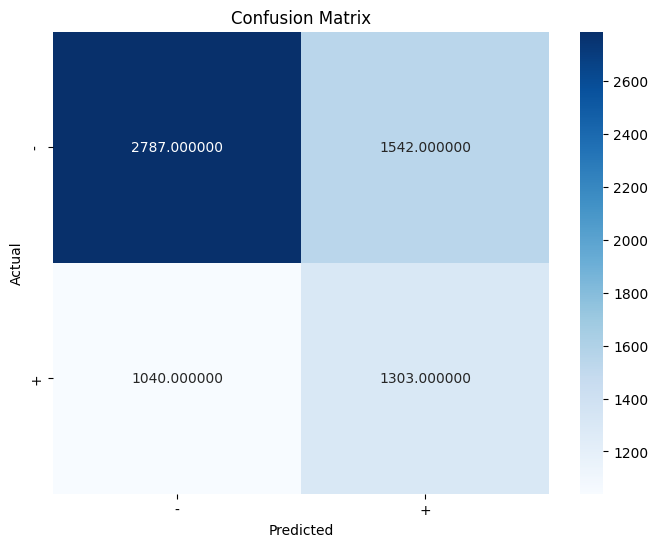

In [4]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
